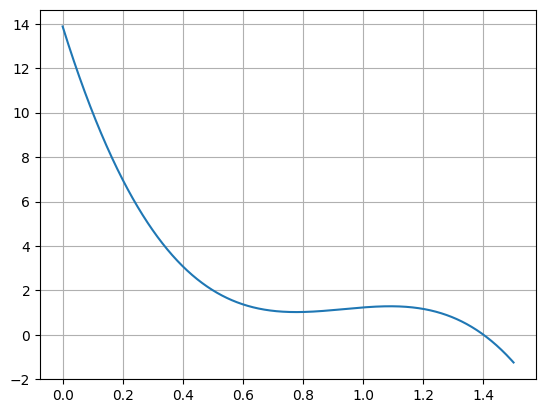

0.22435897435897445


In [6]:
import numpy as np
import sympy

def get_base_polinom (X_values, i):
    def innner_func (x):
        numer = 1
        divizion = 1
        for j in range(len(X_values)):
            if j != i:
                numer *= (x - X_values[j])
                divizion *= (X_values[i] - X_values[j])
        return numer / divizion
    return innner_func

def create_polinom (x_val, y_val):
    based = []
    for i in range(len(x_val)):
        based.append(get_base_polinom(x_val, i))
    
    def get_polinom (x):
        result = 0
        for i in range(len(y_val)):
            result += y_val[i]*based[i](x)
        return result
    return get_polinom

def f (x):
    return 1 / x


Xi = [0.1, 0.5, 0.9, 1.3]
Yi = [f(i) for i in Xi]

lag_pol = create_polinom(Xi, Yi)
Xxx = np.linspace(0, 1.5, 1000)
Yyy = []
for x in Xxx:
    Yyy.append(lag_pol(x))

import matplotlib.pyplot as plt

plt.figure()
plt.plot(Xxx, Yyy)
plt.grid()
plt.show()

print( abs(lag_pol(0.8) - f(0.8)) )


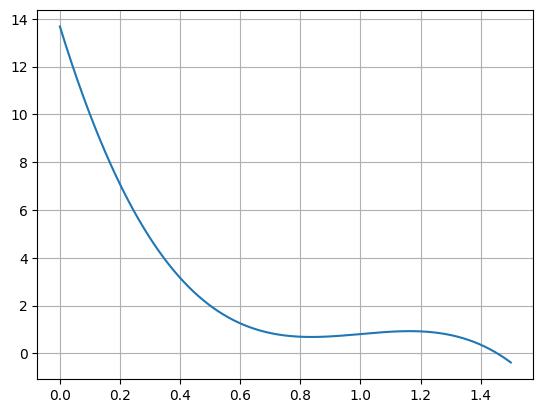

0.5506993006993008


In [133]:
Xi = [0.1, 0.5, 1.1, 1.3]
Yi = [f(i) for i in Xi]

lag_pol = create_polinom(Xi, Yi)
Xxx = np.linspace(0, 1.5, 1000)
Yyy = []
for x in Xxx:
    Yyy.append(lag_pol(x))

import matplotlib.pyplot as plt

plt.figure()
plt.plot(Xxx, Yyy)
plt.grid()
plt.show()

print( abs(lag_pol(0.8) - f(0.8)) )

Найдём оченку погрешности

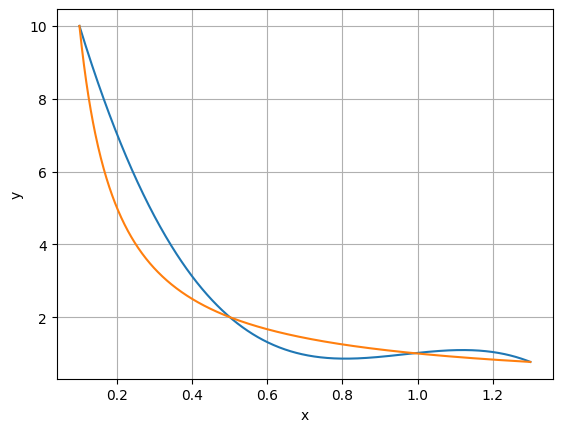

In [148]:
lag_pol = create_polinom(Xi, Yi)
Xxx = np.linspace(0.1, 1.3, 800)
Yyy = []
for x in Xxx:
    Yyy.append(lag_pol(x))

# нарисуем графики полинома и функции
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(Xxx, Yyy)
plt.plot(Xxx, [f(x) for x in Xxx])
plt.show()    

In [149]:
# вычислим значение Mn
# у нас будет четвёрная производная 
x = sympy.Symbol('x')
f = 1/x
fourth_derivative = sympy.diff(f, x, 4)
# print(fourth_derivative)

def four_f(x):
    return 24 / (x**5)

Mn = max([four_f(x) for x in Xxx])

Xi = [0.1, 0.5, 0.9, 1.3]

# функция Wk 
def wk (x):
    res = 1
    for j in range(4):
        res *= (x - Xi[j])
    return res

def f(x):
    return 1 / x

# цункция факториала
def fact(n):
    if n == 1 or n == 0:
        return 1
    return fact(n-1)*n

res = list()

# проверим утверждение
for x in Xxx:
    expression = ((abs(f(x) - float(lag_pol(x)))) <= (Mn * abs(wk(x) / fact(4))))
    if not expression:
        print(x)
    res.append(expression)
print(res.count(True), res.count(False))

800 0


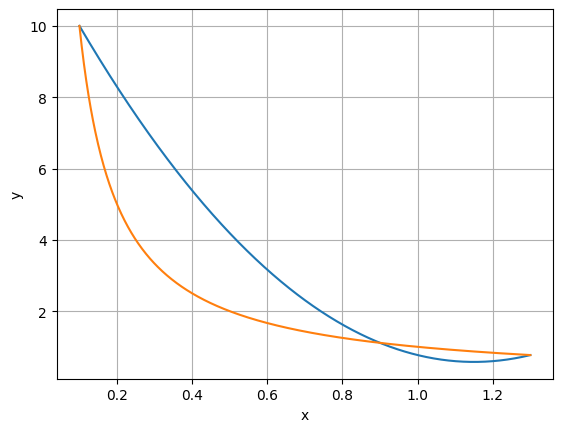

800 0


In [179]:
# проверим тоже самое для 3х точек
def f(x):
    return 1/x

Xi = [0.1, 0.9, 1.3]
Yi = [f(i) for i in Xi]

lag_pol = create_polinom(Xi, Yi)
Xxx = np.linspace(0.1, 1.3, 800)
Yyy = []
for x in Xxx:
    Yyy.append(lag_pol(x))

# нарисуем графики полинома и функции
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(Xxx, Yyy)
plt.plot(Xxx, [f(x) for x in Xxx])
plt.show()    

# вычислим значение Mn
# у нас будет третья производная 
x = sympy.Symbol('x')
f = 1/x
derivative = sympy.diff(f, x, 3)
# print(derivative)


def three_f(x):
    return -6 / (x**4)

Mn = max([abs(three_f(x)) for x in Xxx])

# функция Wk 
def wk (x):
    res = 1
    for j in range(3):
        res *= (x - Xi[j])
    return res

res = list()

def f(x):
    return 1/x

# проверим утверждение
for x in Xxx:
    expression = ((abs(f(x) - float(lag_pol(x)))) <= (Mn * abs(wk(x) / fact(3))))
    res.append(expression)
print(res.count(True), res.count(False))

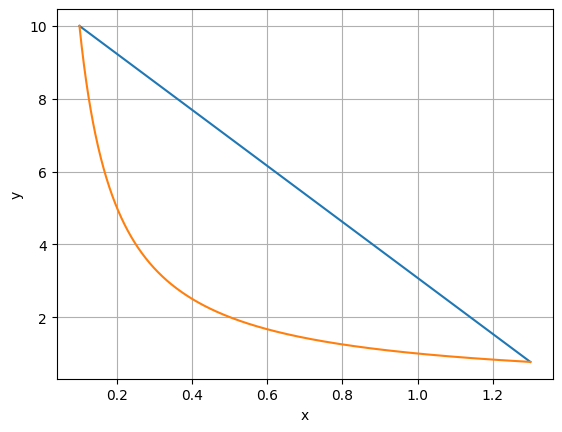

800 0


In [181]:
# проверим тоже самое для 2х точек

def f (x):
    return 1/x

Xi = [0.1, 1.3]
Yi = [f(i) for i in Xi]

lag_pol = create_polinom(Xi, Yi)
Xxx = np.linspace(0.1, 1.3, 800)
Yyy = []
for x in Xxx:
    Yyy.append(lag_pol(x))

# нарисуем графики полинома и функции
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.plot(Xxx, Yyy)
plt.plot(Xxx, [f(x) for x in Xxx])
plt.show()    

# вычислим значение Mn
# у нас будет третья производная 
x = sympy.Symbol('x')
f = 1/x
derivative = sympy.diff(f, x, 2)
# print(derivative)


def two_f(x):
    return 2 / (x**3)

Mn = max([abs(two_f(x)) for x in Xxx])

# функция Wk 
def wk (x):
    res = 1
    for j in range(2):
        res *= (x - Xi[j])
    return res


res = list()

def f(x):
    return 1 / x

# проверим утверждение
for x in Xxx:
    expression = ((abs(f(x) - float(lag_pol(x)))) <= (Mn * abs(wk(x) / fact(3))))
    if not expression:
        print(x)
    res.append(expression)
print(res.count(True), res.count(False))

Как видим - выражение верно всегда

# Теперь найдём оценку погрешности с помощью разделённых разностей

In [198]:
def f (x):
    return 1/x

Xi = [0.1, 0.5, 1.1, 1.3]
Yi = [f(i) for i in Xi]

lag_pol = create_polinom(Xi, Yi)
Xxx = np.linspace(0.1, 1.3, 800)
Yyy = []
for x in Xxx:
    Yyy.append(lag_pol(x))

# функция wn
def wn (x):
    res = 1
    for j in range(4):
        res *= (x - Xi[j])
    return res


def f_razd (xvalues = list()):
    if len(xvalues) == 2:
        return ((f(xvalues[1]) - f(xvalues[0]) ) / (xvalues[1] - xvalues[0])) 
    return f_razd(xvalues[1:]) - f_razd(xvalues[:-1]) / (xvalues[-1] / xvalues[0])

# def f_razd (xvalues = list()):
#     res = 0
#     for j in range(0, len(xvalues)):
#         division = 1
#         for i in range(0, len(xvalues)):
#             if i != j:
#                 division *= (xvalues[j] - xvalues[i])

#         res += f(xvalues[j]) / division
#     return res

res = list()
for x in Xxx:
    expression = ((f(x) - lag_pol(x)) == (f_razd(Xi)*wn(x)))
    res.append(expression)

print(res.count(True), res.count(False))

800 0


# Домашнее задание 3

Найдём корни многочлена чебышева 4 степени (a = 0.1, b = 1.3) (n = 4)

In [8]:
from numpy import cos, pi
n = 4
a = 0.1
b = 1.3
racines = list()
for m in range(0, 4): # от 0 до 3
    Xm = float((b+a) / 2 + ((b-a)/2)*cos(((pi*(2*m+1))/(2*n))))
    racines.append(Xm)
racines.sort()
print(racines)

[0.145672280493228, 0.47038994058094624, 0.929610059419054, 1.2543277195067721]


построим многочлен лагранжа по этим точкам

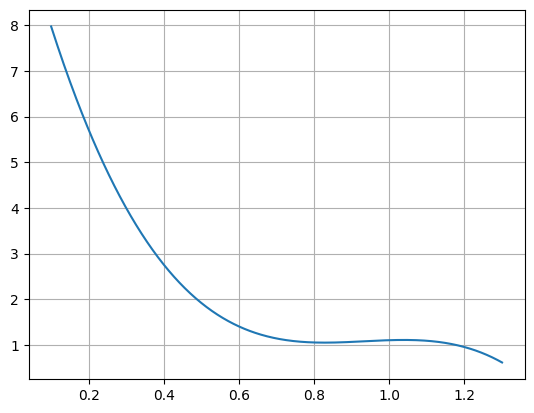

In [9]:
Xi = racines
Yi = [f(i) for i in Xi]

lag_pol = create_polinom(Xi, Yi)
Xxx = np.linspace(0.1, 1.3, 500)
Yyy = []
for x in Xxx:
    Yyy.append(lag_pol(x))

import matplotlib.pyplot as plt

plt.figure()
plt.plot(Xxx, Yyy)
plt.grid()
plt.show()

Найдём оценку погрешности

In [10]:
def f(x):
    return 1/x

left_part = max([abs(f(x)-lag_pol(x)) for x in Xxx])


# вычислим значение Mn
# у нас будет четвёртая производная 
x = sympy.Symbol('x')
f = 1/x
derivative = sympy.diff(f, x, 4)
# print(derivative)

def der(x):
    return 24/x**5

Mn = max([der(x) for x in Xxx])

def fact(n):
    if n == 1 or n == 0:
        return 1
    return fact(n-1) * n

rigth_part = Mn *  (b-a)**n * 2**(1-2*n)

print(left_part <= rigth_part)

True


Получам верное неравенство